In [1]:
import sys; sys.path.append('..')
import random
import pyzx as zx

%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
%matplotlib inline

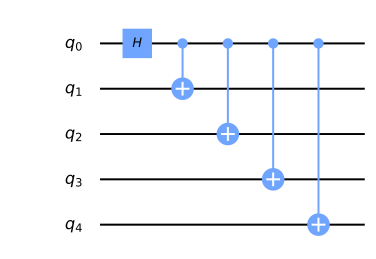

In [3]:
ghz = QuantumCircuit(5)
ghz.h(0)
for idx in range(1,5):
    ghz.cx(0,idx)
ghz.draw(output='mpl')

The GHZ circuit in QASM

In [4]:
print(ghz.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
h q[0];
cx q[0],q[1];
cx q[0],q[2];
cx q[0],q[3];
cx q[0],q[4];



In [10]:
circ = zx.Circuit.from_qasm(ghz.qasm()).to_graph()
zx.draw(circ)

In [13]:
c = zx.Circuit.from_graph(circ).to_qasm()
print(c)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
h q[0];
cx q[0], q[1];
cx q[0], q[2];
cx q[0], q[3];
cx q[0], q[4];



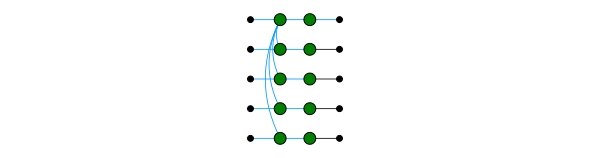

In [7]:
g = circ.copy()
zx.clifford_simp(g)
g.normalise() # Reposition nodes horizontally to look nicer
zx.draw(g)

In [8]:
c = zx.extract.streaming_extract(g)
print(c.to_basic_gates().to_qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[5];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
cz q[0], q[1];
cz q[0], q[2];
cz q[0], q[3];
cz q[0], q[4];
h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
h q[0];



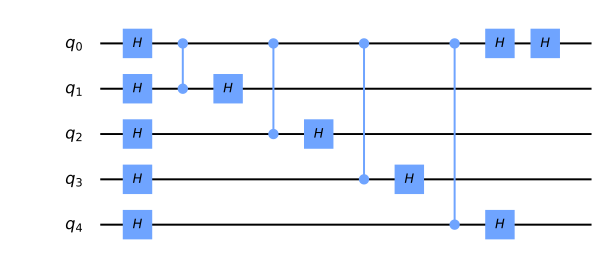

In [9]:
zx_ghz = QuantumCircuit().from_qasm_str(c.to_qasm())
zx_ghz.draw(output='mpl')

In [10]:

#Changing the simulator 
backend = Aer.get_backend('unitary_simulator')

#job execution and getting the result as an object
job_ghz = execute(ghz, backend)
result_ghz = job_ghz.result()

#get the unitary matrix from the result object
print(result_ghz.get_unitary(ghz, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j ...  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j ...  0.   +0.j  0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j ...  0.   +0.j  0.   +0.j  0.   +0.j]
 ...
 [ 0.   +0.j  0.   +0.j  0.707+0.j ...  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j ...  0.   +0.j  0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j ...  0.   +0.j  0.   +0.j  0.   +0.j]]


In [11]:

#job execution and getting the result as an object
job_zx_ghz = execute(zx_ghz, backend)
result_zx_ghz = job_zx_ghz.result()

#get the unitary matrix from the result object
print(result_zx_ghz.get_unitary(zx_ghz, decimals=3))

[[ 0.707-0.j  0.707-0.j  0.   +0.j ...  0.   -0.j  0.   +0.j -0.   -0.j]
 [ 0.   +0.j  0.   +0.j -0.   -0.j ... -0.   -0.j  0.707-0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707-0.j ... -0.   -0.j -0.   +0.j  0.   -0.j]
 ...
 [ 0.   +0.j -0.   -0.j  0.707-0.j ...  0.   +0.j -0.   +0.j -0.   +0.j]
 [ 0.   +0.j -0.   -0.j -0.   -0.j ...  0.   +0.j  0.707-0.j  0.707-0.j]
 [ 0.707-0.j -0.707+0.j  0.   +0.j ... -0.   +0.j  0.   +0.j  0.   +0.j]]


In [28]:
np.array_equal(result_ghz.get_unitary(ghz, decimals=3),result_zx_ghz.get_unitary(zx_ghz, decimals=3))

True

In [51]:
provider = IBMQ.get_provider(group='open')
provider.backends(simulator=False)
backend = provider.get_backend('ibmq_16_melbourne')
backend.configuration().basis_gates

['u1', 'u2', 'u3', 'cx', 'id']

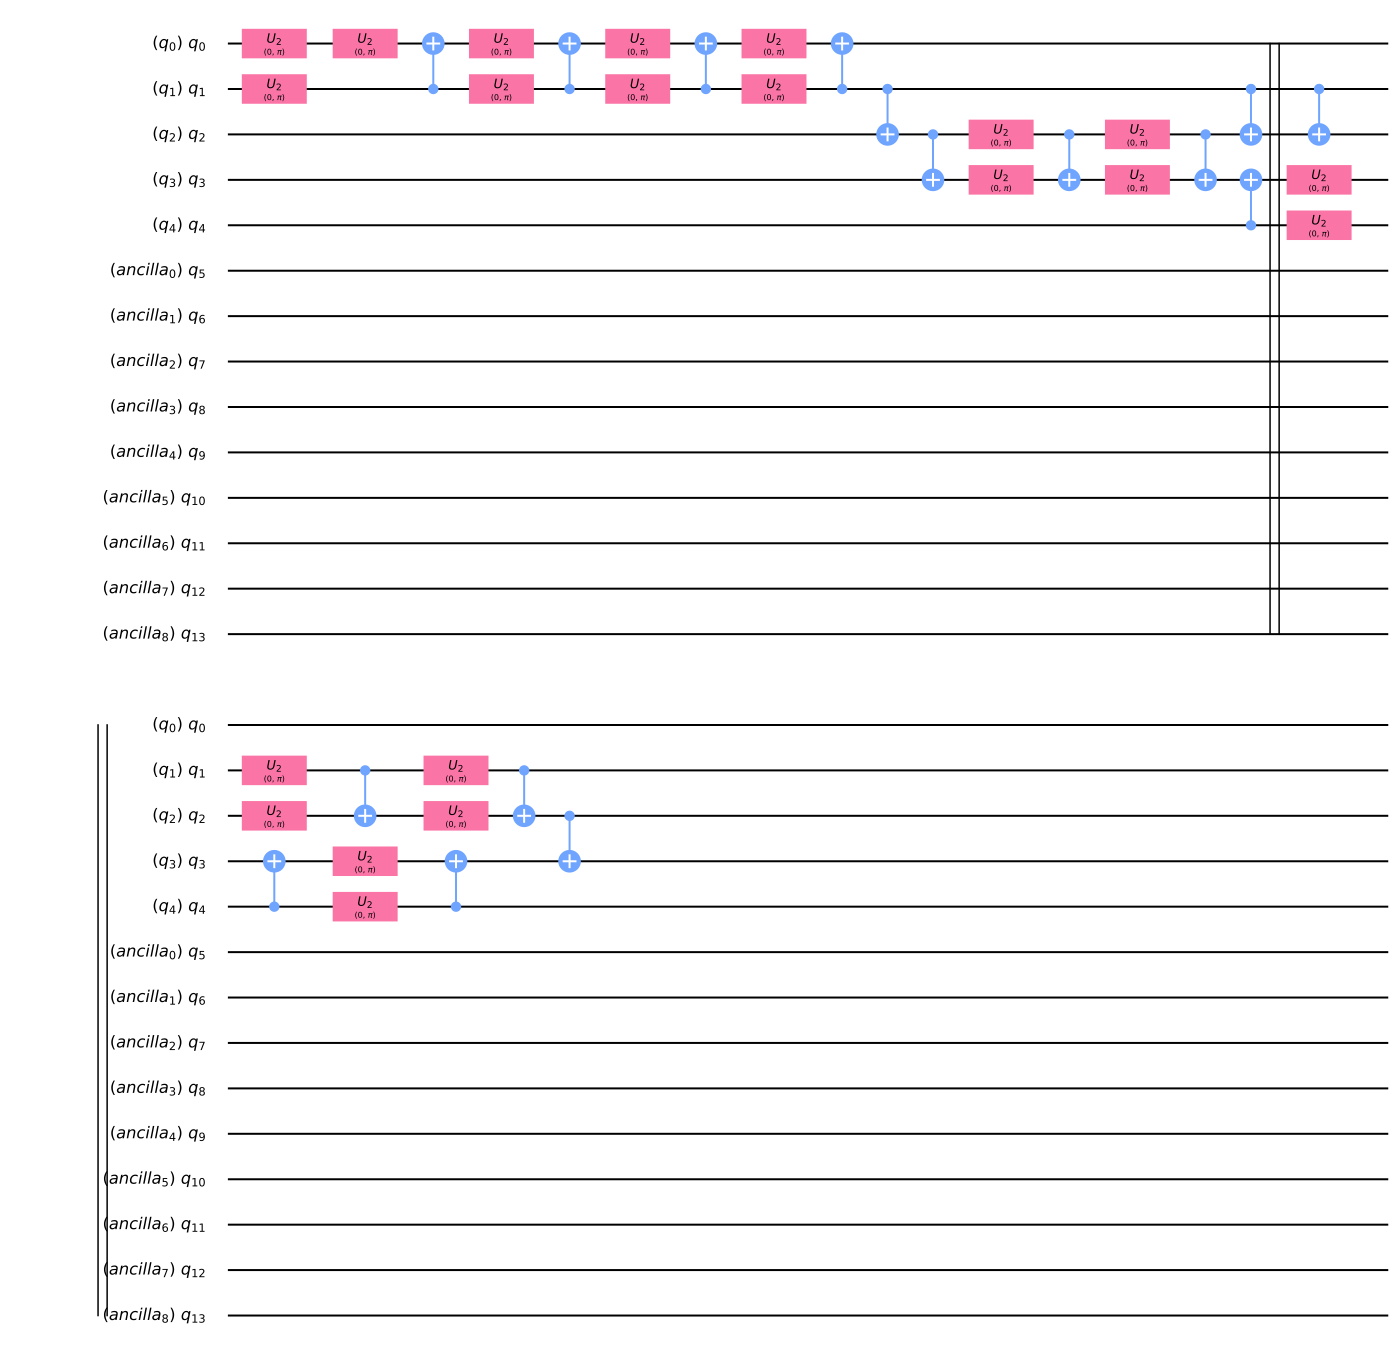

In [53]:
tp_ghz_lv0 = transpile(ghz, backend=backend, optimization_level=0)
tp_ghz_lv0.draw(output='mpl')